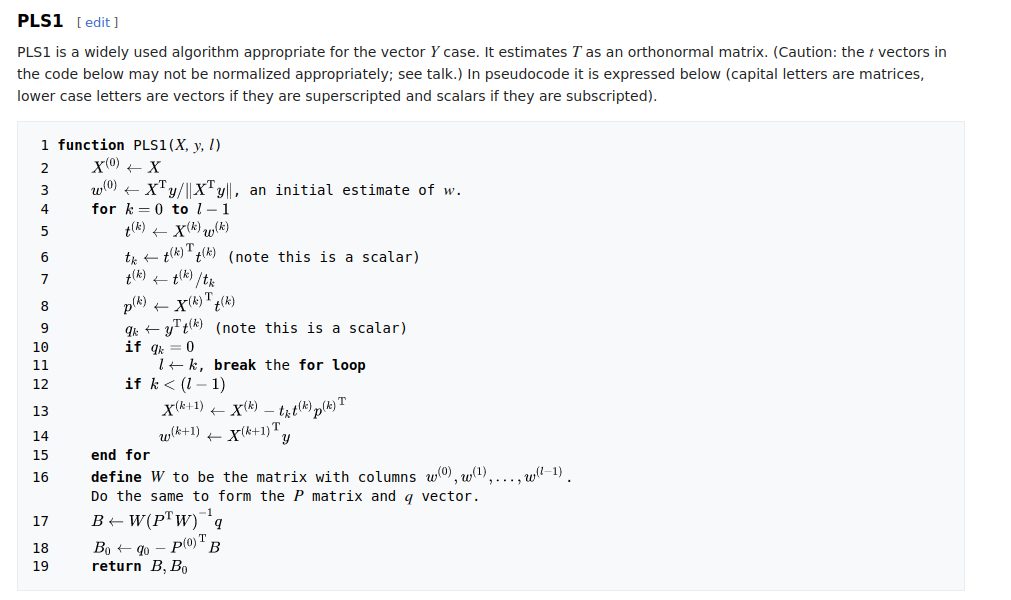

# PLS1

In [145]:
import numpy as np
from numpy.linalg import LinAlgError

def PLS1(X, y, l):
    if l > 26:
        print("l must be less than 26")
        return None, None
    try:
        n, m = X.shape
        W = np.zeros((m, l))
        P = np.zeros((m, l))
        q = np.zeros(l)
        B = np.zeros(l)
        Xk = X.copy()
        wk = Xk.T @ y / np.linalg.norm(Xk.T @ y)
        for k in range(l):
            tk = Xk @ wk
            tk_norm = (tk.T * tk)
            tk = (tk/tk_norm).reshape(-1, 1)
            assert tk.shape == (n, 1)
            pk = Xk.T @ tk
            qk = y.T @ tk
            if np.any(qk) == 0:
                l = k
                break
            W[:, k] = wk
            P[:, k] = pk.reshape(-1)
            q[k] = qk
            if k < (l - 1):
                Xk = Xk - tk_norm*tk.reshape(-1, 1) @ (pk.reshape(1, -1).T)
                wk = Xk.T @ y 
                
        P = np.column_stack([P[:, i] for i in range(l)])
        W = np.column_stack([W[:, i] for i in range(l)])
        q = q.reshape(-1, 1)
        B = W @ np.linalg.inv(P.T@W) @ q
        B0 = q[0] - P[:, 0].T @ B
        
        return B, B0

    except LinAlgError as e:
        print(f"Error: {e}")
        return None, None
X=np.array([[1,2,3],[4,5,6],[7,8,9]])
y=np.array([1,2,3])

B, B0 = PLS1(X, y, 26)
print("B",B)
print("B0",B0)

B [[-0.74135539]
 [ 0.03794487]
 [ 0.82794507]]
B0 [-0.21654973]


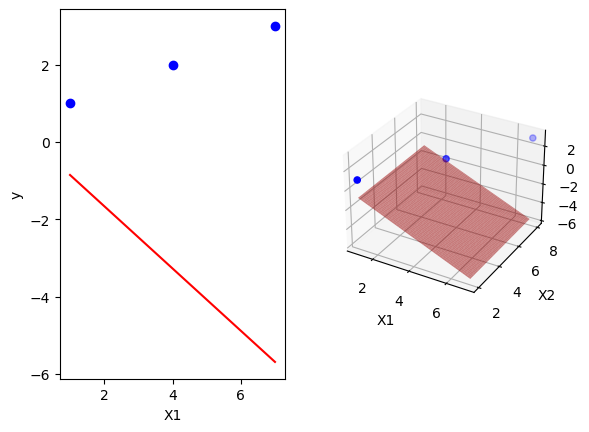

In [136]:
import matplotlib.pyplot as plt
def plot_3D(X, y, B, B0):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(X[:, 0], X[:, 1], y, color='blue', marker='o', label='Data Points')

    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    regression_line = B[0] * x1_mesh + B[1] * x2_mesh + B0

    ax.plot_surface(x1_mesh, x2_mesh, regression_line, alpha=0.5, color='red', label='Regression Line')

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    plt.show()

def plot2D(X, y, B, B0):
    plt.scatter(X, y, color='blue', marker='o', label='Data Points')
    plt.plot(X, B*X + B0, color='red', label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# plot2D(X[:, 0], y, B[0], B0)
# plot_3D(X, y, B, B0)

def plot_2and_3D(X, y, B, B0):
    fig = plt.figure()
    ax = fig.add_subplot(121)
    ax2 = fig.add_subplot(122, projection='3d')

    ax.scatter(X[:, 0], y, color='blue', marker='o', label='Data Points')
    ax.plot(X[:, 0], B[0]*X[:, 0] + B0, color='red', label='Regression Line')
    ax.set_xlabel('X1')
    ax.set_ylabel('y')

    ax2.scatter(X[:, 0], X[:, 1], y, color='blue', marker='o', label='Data Points')

    x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
    x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    regression_line = B[0] * x1_mesh + B[1] * x2_mesh + B0

    ax2.plot_surface(x1_mesh, x2_mesh, regression_line, alpha=0.5, color='red', label='Regression Line')

    ax2.set_xlabel('X1')
    ax2.set_ylabel('X2')
    ax2.set_zlabel('y')
    plt.show()

plot_2and_3D(X, y, B, B0)

B [[0.31074093]
 [0.38488273]
 [0.31830196]]
B0 [0.]


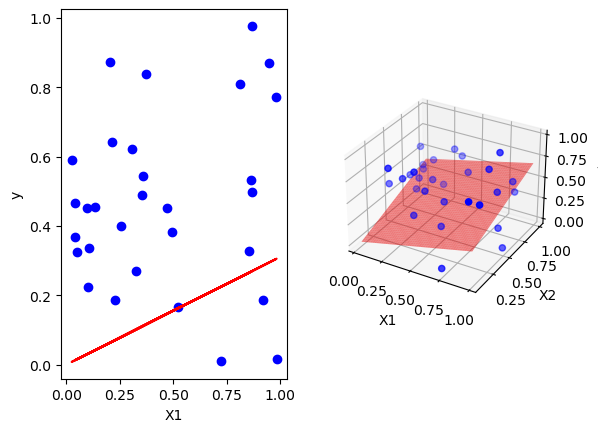

In [130]:
random_data_X = np.random.rand(30, 3)
# print(random_data_X)
random_data_y = np.random.rand(30)

B, B0 = PLS1(random_data_X, random_data_y, 1)
print("B",B)
print("B0",B0)

plot_2and_3D(random_data_X, random_data_y, B, B0)

# chatGPT

In [148]:
import numpy as np
from numpy.linalg import LinAlgError

def PLS1(X, y, l):
    try:
        Xk = X.copy()
        wk = X.T @ y / np.linalg.norm(X.T @ y)

        for k in range(l):
            tk = Xk @ wk
            tk_norm = tk.T @ tk
            tk = tk / tk_norm
            pk = Xk.T @ tk
            qk = y.T @ tk

            if qk == 0:
                l = k
                break

            if k < (l-1):
                Xk = Xk - (tk_norm * np.outer(pk, tk)).T
                wk = Xk.T @ y

        W = np.column_stack([X[:, i] for i in range(l)])
        P = np.column_stack([X[:, i] for i in range(l)])
        q = y

        # Check if the matrix is singular
        if np.linalg.det(W.T @ P) == 0:
            raise LinAlgError("Singular matrix. Cannot compute the inverse.")

        B = np.linalg.inv(W.T @ P) @ q
        B0 = q[0] - P[:, 0].T @ B

        return B, B0

    except LinAlgError as e:
        print(f"Error: {e}")
        return None, None

# Example usage:
X1 = np.array([[1, 2], [2, 4], [3, 6]])
y1 = np.array([2, 4, 6])
l1 = 2

X2 = np.array([[1, 2], [2, 4], [3, 6]])
y2 = np.array([2, 4, 2])  # Example with a singular matrix
l2 = 2

B1, B0_1 = PLS1(X1, y1, l1)
print("Example 1:")
print("B:", B1)
print("B0:", B0_1)

B2, B0_2 = PLS1(X2, y2, l2)
print("\nExample 2:")
print("B:", B2)
print("B0:", B0_2)


Error: Singular matrix. Cannot compute the inverse.
Example 1:
B: None
B0: None
Error: Singular matrix. Cannot compute the inverse.

Example 2:
B: None
B0: None
